In [2]:
using DrWatson
quickactivate(@__DIR__)

using StatsBase
using Plots
using DataFrames
using CSV

In [3]:
res = DrWatson.collect_results(
        datadir("sims"),
        rinclude=[r"NumerFig1[.]*"]
        #   black_list = bl,
    )
first(res, 10)

┌ Info: Scanning folder /home/pgorski/Desktop/programming/curheider/PolarizationFramework/data/sims for result files.
└ @ DrWatson /home/pgorski/.julia/packages/DrWatson/S4dYA/src/result_collection.jl:115
┌ Info: Added 750 entries.
└ @ DrWatson /home/pgorski/.julia/packages/DrWatson/S4dYA/src/result_collection.jl:191


,ode_fun_name,LP,LP_std,zmax,pos_links_changed_std,BR_std,GP
,String?,Float64?,Float64?,Int64?,Float64?,Float64?,Float64?
1,Heider7!,0.78,0.23355,100,1.41078,0.0,0.94
2,Heider7!,0.744,0.246724,100,1.38721,0.0,0.93
3,Heider7!,0.744,0.257541,100,1.56024,0.0,0.92
4,Heider7!,0.774167,0.0880763,100,2.51589,0.0,1.0
5,Heider7!,0.769167,0.0916361,100,2.21954,0.0,1.0
6,Heider7!,0.755833,0.10275,100,2.383,0.0,1.0
7,Heider7!,0.729,0.267157,100,1.11916,0.0,0.91
8,Heider7!,0.744,0.228884,100,1.32035,0.154449,0.8
9,Heider7!,0.579,0.25198,100,1.46677,0.219317,0.29


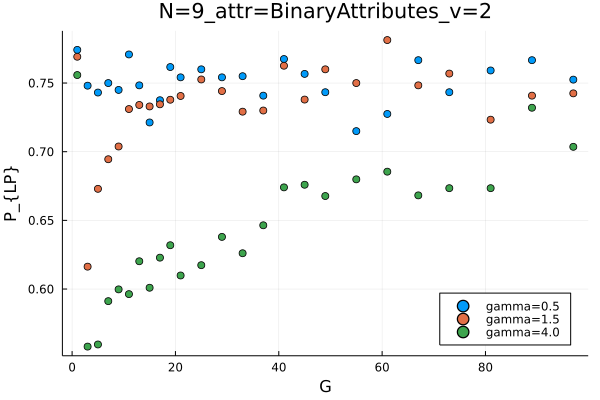

In [22]:
N = 9
attr_name = "BinaryAttributes" # ["BinaryAttributes", "OrderedAttributes", "UnorderedAttributes", "UnorderedPositiveAttributes"]
gamma = unique(res.gamma)
attr_degeneracy = 2 #It should be 2 for BA, 1000 for CA (OrderedAttributes). Otherwise 4. 

params = @strdict N attr_name gamma attr_degeneracy
dicts = dict_list(params)

p = plot()
for dict in dicts
    inds = ones(Bool, size(res)[1])

    for param in dict
        inds .*= res[!, string(param[1])] .== param[2]
    end

    plot!(p, res.G[inds], res.LP[inds], seriestype=:scatter, lab = "gamma="*string(dict["gamma"]))
end

plot(p, xlabel = "G", ylabel = "P_{LP}", legend = :bottomright)
attr = attr_name
v = attr_degeneracy
title!(savename(@ntuple(N, attr, v)))

In [15]:
names(res)[20:end]

26-element Vector{String}:
 "HB_x"
 "attr_threshold"
 "HB"
 "Delta3"
 "times_std"
 "times"
 "neg_links_destab_std"
 "Delta1"
 "Delta0_std"
 "Delta3_std"
 "pos_links_changed"
 "hell"
 "neg_links_changed"
 "neg_links_changed_std"
 "attr_degeneracy"
 "x_attr_sim_std"
 "pos_links_destab_std"
 "BR"
 "N"
 "G"
 "initial_neg_links_count"
 "initial_neg_links_count_std"
 "gamma"
 "neg_links_destab"
 "attr_name"
 "path"

In [18]:
first(res[!, ["N", "G", "attr_name", "gamma", "LP", "GP", "HB", ]], 10)

,N,G,attr_name,gamma,LP,GP,HB
,UInt32?,UInt32?,String?,Float64?,Float64?,Float64?,Float64?
1,5,1,BinaryAttributes,0.5,0.78,0.94,1.0
2,5,1,BinaryAttributes,1.5,0.744,0.93,1.0
3,5,1,BinaryAttributes,4.0,0.744,0.92,1.0
4,9,1,BinaryAttributes,0.5,0.774167,1.0,1.0
5,9,1,BinaryAttributes,1.5,0.769167,1.0,1.0
6,9,1,BinaryAttributes,4.0,0.755833,1.0,1.0
7,5,3,BinaryAttributes,0.5,0.729,0.91,1.0
8,5,3,BinaryAttributes,1.5,0.744,0.8,0.82
9,5,3,BinaryAttributes,4.0,0.579,0.29,0.26
